## Section 0: Ong Song Yi

## Section 1: Ames Housing dataset

## Section 2: Project Definition

### Goals:
In our project, we are taking on the role of Investors seeking to invest in a property that has potential growth value.

### Dataset:
Our sole dataset consists of Ames Housing dataset.

However due to the presence of multiple features, I have supplemented my knowledge with information from this site.
https://rdrr.io/cran/AmesHousing/man/ames_raw.html

### Tasks:

1) Explore the data.
<br>
2) Data cleaning.
<br>
3) Building a Machine Learning model
<br>

## Section 3: Data Exploration / Data Cleaning

* Explore the null values in the data
    * Determine if row(s) / column(s) must be dropped
    * Determine the best method to fill missing values
* Data Cleaning
    * Determine if the feature should be a string or numeral

In [406]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from scipy.stats import norm

In [407]:
df_train = pd.read_csv('../datasets/train.csv')
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [408]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [409]:
percent_nan = df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=False) \
                * 100/ len(df_train)
percent_nan

Pool QC           99.561190
Misc Feature      96.830814
Alley             93.174061
Fence             80.497318
Fireplace Qu      48.756704
Lot Frontage      16.089712
Garage Yr Blt      5.558264
Garage Cond        5.558264
Garage Qual        5.558264
Garage Finish      5.558264
Garage Type        5.509508
Bsmt Exposure      2.827889
BsmtFin Type 2     2.730375
Bsmt Cond          2.681619
Bsmt Qual          2.681619
BsmtFin Type 1     2.681619
Mas Vnr Area       1.072647
Mas Vnr Type       1.072647
Bsmt Half Bath     0.097513
Bsmt Full Bath     0.097513
Total Bsmt SF      0.048757
Bsmt Unf SF        0.048757
BsmtFin SF 2       0.048757
Garage Cars        0.048757
Garage Area        0.048757
BsmtFin SF 1       0.048757
dtype: float64

In [410]:
df_train.drop(['PID', 'Id'], axis=1, inplace=True)
df_train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Conclusion (So - Far):
<br>
1) There are 26 features with the presence of null values
<br>
<br>
2) I have dropped columns 'PID' and 'Id' as they are redundant

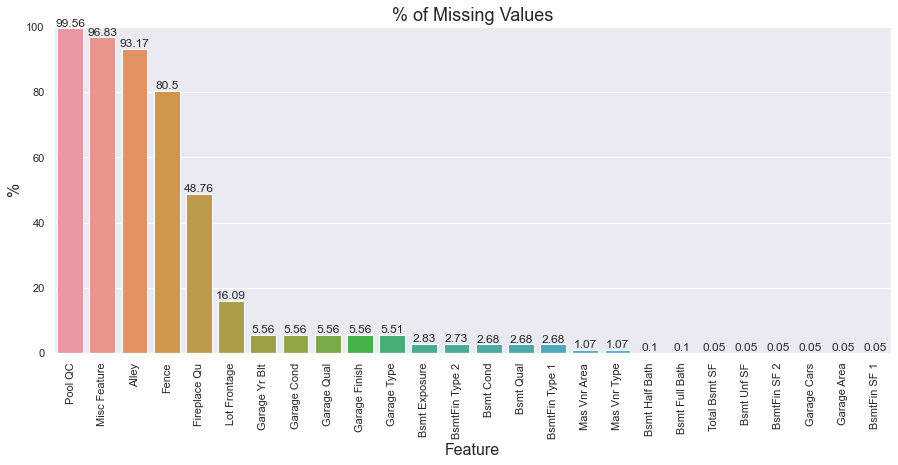

In [411]:
sns.set(rc={'figure.figsize':(15,6)})
ax = sns.barplot(x=percent_nan.index, y=round(percent_nan,2))
plt.xticks(rotation=90)
plt.ylim(0,100)
plt.title('% of Missing Values', fontsize=18)
plt.ylabel('%', fontsize=16)
plt.xlabel('Feature', fontsize=16)
for i in ax.containers:
    ax.bar_label(i,);

In [412]:
percent_nan[percent_nan < 1]

Bsmt Half Bath    0.097513
Bsmt Full Bath    0.097513
Total Bsmt SF     0.048757
Bsmt Unf SF       0.048757
BsmtFin SF 2      0.048757
Garage Cars       0.048757
Garage Area       0.048757
BsmtFin SF 1      0.048757
dtype: float64

### Conclusion (So - Far):
<br>
1) There are 26 features with the presence of null values
<br>
<br>
2) I have dropped columns 'PID' and 'Id' as they are redundant
<br>
<br>
3) The features, 'Bsmt Half Bath', 'Bsmt Full Bath', 'Total Bsmt SF', 'Bsmt Unf SF', 'BsmtFin SF 2', 'Garage Cars', 'Garage Area' and 'BsmtFin SF 1' have less than 1% of Null values

## Data Exploration - Part 1

In [413]:
percent_nan = df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=False) \
                * 100 / len(df_train)
percent_nan

Pool QC           99.561190
Misc Feature      96.830814
Alley             93.174061
Fence             80.497318
Fireplace Qu      48.756704
Lot Frontage      16.089712
Garage Yr Blt      5.558264
Garage Cond        5.558264
Garage Qual        5.558264
Garage Finish      5.558264
Garage Type        5.509508
Bsmt Exposure      2.827889
BsmtFin Type 2     2.730375
Bsmt Cond          2.681619
Bsmt Qual          2.681619
BsmtFin Type 1     2.681619
Mas Vnr Area       1.072647
Mas Vnr Type       1.072647
Bsmt Half Bath     0.097513
Bsmt Full Bath     0.097513
Total Bsmt SF      0.048757
Bsmt Unf SF        0.048757
BsmtFin SF 2       0.048757
Garage Cars        0.048757
Garage Area        0.048757
BsmtFin SF 1       0.048757
dtype: float64

In [414]:
columns_to_explore = ['Garage Yr Blt', 'Garage Cond', 'Garage Qual', 'Garage Finish', 'Garage Type',\
                     'Bsmt Exposure', 'BsmtFin Type 2', 'Bsmt Cond', 'Bsmt Qual', 'BsmtFin Type 1', \
                     'Mas Vnr Area', 'Mas Vnr Type', 'Bsmt Half Bath', 'Bsmt Full Bath',\
                     'Total Bsmt SF', 'Bsmt Unf SF', 'BsmtFin SF 2', 'Garage Cars', 'Garage Area', \
                     'BsmtFin SF 1']
df_train[columns_to_explore]

,Garage Yr Blt,Garage Cond,Garage Qual,Garage Finish,Garage Type,Bsmt Exposure,BsmtFin Type 2,Bsmt Cond,Bsmt Qual,BsmtFin Type 1,Mas Vnr Area,Mas Vnr Type,Bsmt Half Bath,Bsmt Full Bath,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 2,Garage Cars,Garage Area,BsmtFin SF 1
0,1976.0,TA,TA,RFn,Attchd,No,Unf,TA,TA,GLQ,289.0,BrkFace,0.0,0.0,725.0,192.0,0.0,2.0,475.0,533.0
1,1997.0,TA,TA,RFn,Attchd,No,Unf,TA,Gd,GLQ,132.0,BrkFace,0.0,1.0,913.0,276.0,0.0,2.0,559.0,637.0
2,1953.0,TA,TA,Unf,Detchd,No,Unf,TA,TA,GLQ,0.0,None,0.0,1.0,1057.0,326.0,0.0,1.0,246.0,731.0
3,2007.0,TA,TA,Fin,BuiltIn,No,Unf,TA,Gd,Unf,0.0,None,0.0,0.0,384.0,384.0,0.0,2.0,400.0,0.0
4,1957.0,TA,TA,Unf,Detchd,No,Unf,Gd,Fa,Unf,0.0,None,0.0,0.0,676.0,676.0,0.0,2.0,484.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2007.0,TA,TA,Fin,Attchd,Av,Unf,TA,Gd,GLQ,0.0,None,0.0,1.0,1884.0,873.0,0.0,2.0,520.0,1011.0
2047,1961.0,TA,TA,Unf,Detchd,No,Unf,TA,TA,BLQ,0.0,None,0.0,0.0,861.0,599.0,0.0,2.0,539.0,262.0
2048,1929.0,Fa,Fa,Unf,Detchd,No,Unf,TA,TA,Unf,0.0,None,0.0,0.0,896.0,896.0,0.0,2.0,342.0,0.0
2049,1956.0,TA,TA,Unf,Attchd,No,LwQ,TA,TA,Rec,0.0,None,0.0,1.0,1200.0,295.0,750.0,1.0,294.0,155.0


In [415]:
for column_name in df_train[columns_to_explore].columns:
    if is_string_dtype(df_train[column_name]):
        df_train[column_name] = df_train[column_name].fillna('None')
    else:
        df_train[column_name] = df_train[column_name].fillna(0)        

## Data Exploration - Part 2

1) The columns that I have explored detail the Basement, Masonry and Garage of a home.
<br>
<br>
2) For homes that have neither Basement nor Masonry nor Garage, if it is a string column, I will fill it with 'None'.
<br>
<br>
3) If it is a numerical column, I will fill it with the value 0.

In [416]:
percent_nan = df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=False) \
                * 100 / len(df_train)
percent_nan

Pool QC         99.561190
Misc Feature    96.830814
Alley           93.174061
Fence           80.497318
Fireplace Qu    48.756704
Lot Frontage    16.089712
dtype: float64

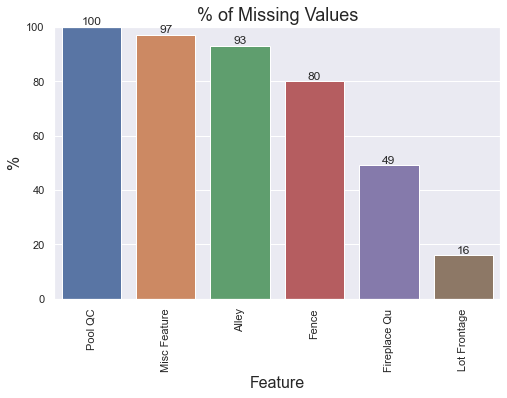

In [417]:
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.barplot(x=percent_nan.index, y=round(percent_nan,0))
plt.xticks(rotation=90)
plt.ylim(0,100)
plt.title('% of Missing Values', fontsize=18)
plt.ylabel('%', fontsize=16)
plt.xlabel('Feature', fontsize=16)
for i in ax.containers:
    ax.bar_label(i,);

## Data Exploration - Part 3

1) 6 Remaining features have null values, 4 of them have more than 50% NaN
<br>
<br>
2) As missing values constitute the majority of the columns, I will drop these columns.

In [418]:
df_train.drop(labels=['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1, inplace=True)

In [419]:
percent_nan = df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=False) \
                * 100 / len(df_train)
percent_nan

Fireplace Qu    48.756704
Lot Frontage    16.089712
dtype: float64

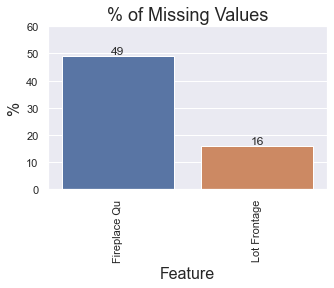

In [420]:
sns.set(rc={'figure.figsize':(5,3)})
ax = sns.barplot(x=percent_nan.index, y=round(percent_nan,0))
plt.xticks(rotation=90)
plt.ylim(0,60)
plt.title('% of Missing Values', fontsize=18)
plt.ylabel('%', fontsize=16)
plt.xlabel('Feature', fontsize=16)
for i in ax.containers:
    ax.bar_label(i,);

## Data Exploration - Part 4

1) Only 2 remaining columns have missing values.
<br>
<br>
2) For the column name 'Fireplace Qu', I will fill in the missing values with 'None' as some homes do not have the presence of a fireplace.
<br>
<br>
3) Regarding 'Lot Frontage', I will make the assumption that it is highly correlated with the Neighborhood the home is situated in. Therefore, I will fill the missing values with the mean Lot Frontage of the respective Neighborhood.
<br>
<br>
4) There are some Neighborhood with missing values in their mean 'Lot Frontage', I will fillna with 0 in this scenario. This affects 3 rows.

In [421]:
df_train['Fireplace Qu'].fillna(value='None', inplace=True)

In [422]:
percent_nan = df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=False) \
                * 100 / len(df_train)
percent_nan

Lot Frontage    16.089712
dtype: float64

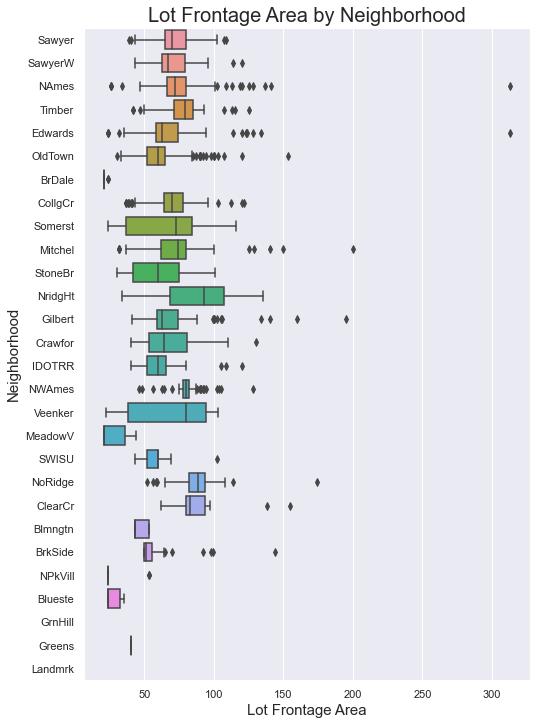

In [423]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df_train, orient='h')
plt.title('Lot Frontage Area by Neighborhood', fontsize=20)
plt.xlabel('Lot Frontage Area', fontsize=15)
plt.ylabel('Neighborhood', fontsize=15);

In [424]:
df_train.groupby('Neighborhood').mean()['Lot Frontage']

Neighborhood
Blmngtn    47.250000
Blueste    27.666667
BrDale     21.315789
BrkSide    56.357143
ClearCr    92.500000
CollgCr    70.753247
Crawfor    69.272727
Edwards    66.930233
Gilbert    72.025641
Greens     40.000000
GrnHill          NaN
IDOTRR     61.890625
Landmrk          NaN
MeadowV    26.809524
Mitchel    75.476923
NAmes      75.192453
NPkVill    27.625000
NWAmes     80.965517
NoRidge    88.305556
NridgHt    86.294118
OldTown    62.802548
SWISU      58.387097
Sawyer     72.774648
SawyerW    70.493333
Somerst    63.982906
StoneBr    60.058824
Timber     78.594595
Veenker    67.846154
Name: Lot Frontage, dtype: float64

In [425]:
df_train['Lot Frontage'] = df_train.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [426]:
percent_nan = df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=False) \
                * 100 / len(df_train)
percent_nan

Lot Frontage    0.14627
dtype: float64

In [427]:
df_train['Lot Frontage'].fillna(value=0, inplace=True)

In [428]:
percent_nan = df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=False) \
                * 100 / len(df_train)
percent_nan

Series([], dtype: float64)

## Data Exploration - Part 5
<br>
1) After sifting through the data, column 'MS SubClass' should be an object instead of an integer

In [429]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Frontage     2051 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Street           2051 non-null   object 
 5   Lot Shape        2051 non-null   object 
 6   Land Contour     2051 non-null   object 
 7   Utilities        2051 non-null   object 
 8   Lot Config       2051 non-null   object 
 9   Land Slope       2051 non-null   object 
 10  Neighborhood     2051 non-null   object 
 11  Condition 1      2051 non-null   object 
 12  Condition 2      2051 non-null   object 
 13  Bldg Type        2051 non-null   object 
 14  House Style      2051 non-null   object 
 15  Overall Qual     2051 non-null   int64  
 16  Overall Cond     2051 non-null   int64  
 17  Year Built    

In [430]:
df_train['MS SubClass'] = df_train['MS SubClass'].astype(object)

In [431]:
df_train.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2051 non-null   object
 1   MS Zoning       2051 non-null   object
 2   Street          2051 non-null   object
 3   Lot Shape       2051 non-null   object
 4   Land Contour    2051 non-null   object
 5   Utilities       2051 non-null   object
 6   Lot Config      2051 non-null   object
 7   Land Slope      2051 non-null   object
 8   Neighborhood    2051 non-null   object
 9   Condition 1     2051 non-null   object
 10  Condition 2     2051 non-null   object
 11  Bldg Type       2051 non-null   object
 12  House Style     2051 non-null   object
 13  Roof Style      2051 non-null   object
 14  Roof Matl       2051 non-null   object
 15  Exterior 1st    2051 non-null   object
 16  Exterior 2nd    2051 non-null   object
 17  Mas Vnr Type    2051 non-null   object
 18  Exter Qu

In [432]:
df_train.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2051 non-null   float64
 1   Lot Area         2051 non-null   int64  
 2   Overall Qual     2051 non-null   int64  
 3   Overall Cond     2051 non-null   int64  
 4   Year Built       2051 non-null   int64  
 5   Year Remod/Add   2051 non-null   int64  
 6   Mas Vnr Area     2051 non-null   float64
 7   BsmtFin SF 1     2051 non-null   float64
 8   BsmtFin SF 2     2051 non-null   float64
 9   Bsmt Unf SF      2051 non-null   float64
 10  Total Bsmt SF    2051 non-null   float64
 11  1st Flr SF       2051 non-null   int64  
 12  2nd Flr SF       2051 non-null   int64  
 13  Low Qual Fin SF  2051 non-null   int64  
 14  Gr Liv Area      2051 non-null   int64  
 15  Bsmt Full Bath   2051 non-null   float64
 16  Bsmt Half Bath   2051 non-null   float64
 17  Full Bath     

In [433]:
df_train.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2051 non-null   object
 1   MS Zoning       2051 non-null   object
 2   Street          2051 non-null   object
 3   Lot Shape       2051 non-null   object
 4   Land Contour    2051 non-null   object
 5   Utilities       2051 non-null   object
 6   Lot Config      2051 non-null   object
 7   Land Slope      2051 non-null   object
 8   Neighborhood    2051 non-null   object
 9   Condition 1     2051 non-null   object
 10  Condition 2     2051 non-null   object
 11  Bldg Type       2051 non-null   object
 12  House Style     2051 non-null   object
 13  Roof Style      2051 non-null   object
 14  Roof Matl       2051 non-null   object
 15  Exterior 1st    2051 non-null   object
 16  Exterior 2nd    2051 non-null   object
 17  Mas Vnr Type    2051 non-null   object
 18  Exter Qu

In [434]:
df_train.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2051 non-null   float64
 1   Lot Area         2051 non-null   int64  
 2   Overall Qual     2051 non-null   int64  
 3   Overall Cond     2051 non-null   int64  
 4   Year Built       2051 non-null   int64  
 5   Year Remod/Add   2051 non-null   int64  
 6   Mas Vnr Area     2051 non-null   float64
 7   BsmtFin SF 1     2051 non-null   float64
 8   BsmtFin SF 2     2051 non-null   float64
 9   Bsmt Unf SF      2051 non-null   float64
 10  Total Bsmt SF    2051 non-null   float64
 11  1st Flr SF       2051 non-null   int64  
 12  2nd Flr SF       2051 non-null   int64  
 13  Low Qual Fin SF  2051 non-null   int64  
 14  Gr Liv Area      2051 non-null   int64  
 15  Bsmt Full Bath   2051 non-null   float64
 16  Bsmt Half Bath   2051 non-null   float64
 17  Full Bath     

## Section 4: Feature Engineering

We undertake the following tasks:
* Perform 1 hot encoding on categorical features
* Select features and split into training and test sets
* Apply StandardScaler
* Remove features that have an absolute correlation score with Sale Price of less than 0.45
* Eliminate features that display multicollinearity

In [435]:
df_train.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,60,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD
1,60,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD
2,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,SBrkr,Gd,Typ,None,Detchd,Unf,TA,TA,Y,WD
3,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,SBrkr,TA,Typ,None,BuiltIn,Fin,TA,TA,Y,WD
4,50,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,N,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,...,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD
2047,30,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD
2048,50,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,...,SBrkr,TA,Typ,TA,Detchd,Unf,Fa,Fa,Y,WD
2049,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD


In [436]:
object_columns = []

for column_name in df_train.select_dtypes(include='object').columns:
    object_columns.append(column_name)

In [437]:
df_object_columns = pd.get_dummies(df_train[object_columns])
df_object_columns

,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,...,Paved Drive_Y,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2047,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2048,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2049,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [438]:
df_numeric_columns = df_train.select_dtypes(exclude='object')
df_numeric_columns

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,72.774648,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,...,0,44,0,0,0,0,0,3,2010,130500
1,43.000000,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,...,0,74,0,0,0,0,0,4,2009,220000
2,68.000000,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,...,0,52,0,0,0,0,0,1,2010,109000
3,73.000000,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,...,100,0,0,0,0,0,0,4,2010,174000
4,82.000000,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,...,0,59,0,0,0,0,0,3,2010,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,79.000000,11449,8,5,2007,2007,0.0,1011.0,0.0,873.0,...,0,276,0,0,0,0,0,1,2008,298751
2047,66.930233,12342,4,5,1940,1950,0.0,262.0,0.0,599.0,...,158,0,0,0,0,0,0,3,2009,82500
2048,57.000000,7558,6,6,1928,1950,0.0,0.0,0.0,896.0,...,0,0,0,0,0,0,0,3,2009,177000
2049,80.000000,10400,4,5,1956,1956,0.0,155.0,750.0,295.0,...,0,189,140,0,0,0,0,11,2009,144000


In [439]:
df_numeric_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2051 non-null   float64
 1   Lot Area         2051 non-null   int64  
 2   Overall Qual     2051 non-null   int64  
 3   Overall Cond     2051 non-null   int64  
 4   Year Built       2051 non-null   int64  
 5   Year Remod/Add   2051 non-null   int64  
 6   Mas Vnr Area     2051 non-null   float64
 7   BsmtFin SF 1     2051 non-null   float64
 8   BsmtFin SF 2     2051 non-null   float64
 9   Bsmt Unf SF      2051 non-null   float64
 10  Total Bsmt SF    2051 non-null   float64
 11  1st Flr SF       2051 non-null   int64  
 12  2nd Flr SF       2051 non-null   int64  
 13  Low Qual Fin SF  2051 non-null   int64  
 14  Gr Liv Area      2051 non-null   int64  
 15  Bsmt Full Bath   2051 non-null   float64
 16  Bsmt Half Bath   2051 non-null   float64
 17  Full Bath     

In [440]:
final_train_df = pd.concat([df_object_columns, df_numeric_columns], axis=1)
final_train_df

,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,0,0,0,0,1,0,0,0,0,...,0,44,0,0,0,0,0,3,2010,130500
1,0,0,0,0,0,1,0,0,0,0,...,0,74,0,0,0,0,0,4,2009,220000
2,1,0,0,0,0,0,0,0,0,0,...,0,52,0,0,0,0,0,1,2010,109000
3,0,0,0,0,0,1,0,0,0,0,...,100,0,0,0,0,0,0,4,2010,174000
4,0,0,0,0,1,0,0,0,0,0,...,0,59,0,0,0,0,0,3,2010,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1,0,0,0,0,0,0,0,0,0,...,0,276,0,0,0,0,0,1,2008,298751
2047,0,1,0,0,0,0,0,0,0,0,...,158,0,0,0,0,0,0,3,2009,82500
2048,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,3,2009,177000
2049,1,0,0,0,0,0,0,0,0,0,...,0,189,140,0,0,0,0,11,2009,144000


In [441]:
final_train_df.corr()['SalePrice'][abs(final_train_df.corr()['SalePrice']) < 0.55]

MS SubClass_20    0.076668
MS SubClass_30   -0.248534
MS SubClass_40   -0.034780
MS SubClass_45   -0.060326
MS SubClass_50   -0.182336
                    ...   
Screen Porch      0.134581
Pool Area         0.023106
Misc Val         -0.007375
Mo Sold           0.032735
Yr Sold          -0.015203
Name: SalePrice, Length: 288, dtype: float64

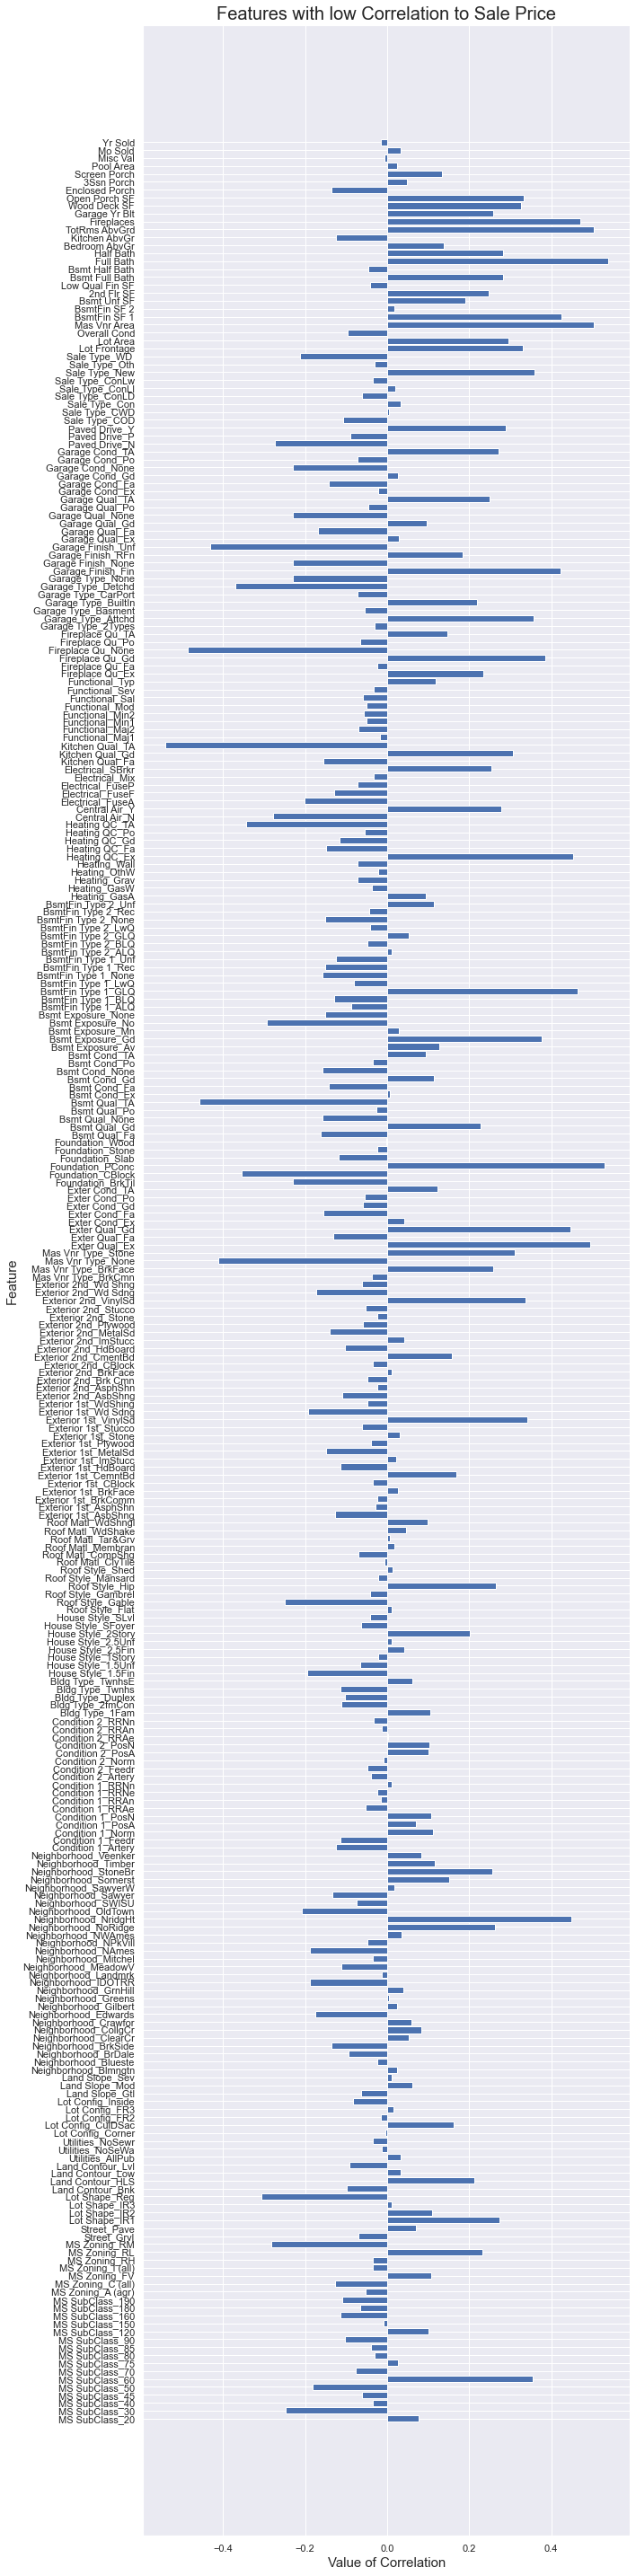

In [442]:
plt.figure(figsize=(10, 40))
plt.barh(final_train_df.corr()['SalePrice'][abs(final_train_df.corr()['SalePrice']) < 0.55].index, \
         final_train_df.corr()['SalePrice'][abs(final_train_df.corr()['SalePrice']) < 0.55].values)
plt.title('Features with low Correlation to Sale Price',fontsize=20)
plt.xlabel('Value of Correlation',fontsize=15)
plt.ylabel('Feature',fontsize=15)
plt.tight_layout();

### Conclusion (So - Far):
<br>
1) After performing one-hot encoding, there are 299 features.
<br>
<br>
2) 288 of the features have a correlation score of less than 0.55 with the Sale Price.
<br>
<br>
2) I will drop these 288 features.

In [443]:
my_list = final_train_df.corr()['SalePrice'][abs(final_train_df.corr()['SalePrice']) < 0.55].index

In [444]:
final_train_df.drop(labels=my_list, axis=1, inplace=True)
final_train_df

,Exter Qual_TA,Bsmt Qual_Ex,Kitchen Qual_Ex,Overall Qual,Year Built,Year Remod/Add,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Cars,Garage Area,SalePrice
0,0,0,0,6,1976,2005,725.0,725,1479,2.0,475.0,130500
1,0,0,0,7,1996,1997,913.0,913,2122,2.0,559.0,220000
2,1,0,0,5,1953,2007,1057.0,1057,1057,1.0,246.0,109000
3,1,0,0,5,2006,2007,384.0,744,1444,2.0,400.0,174000
4,1,0,0,6,1900,1993,676.0,831,1445,2.0,484.0,138500
...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,8,2007,2007,1884.0,1728,1728,2.0,520.0,298751
2047,1,0,0,4,1940,1950,861.0,861,861,2.0,539.0,82500
2048,1,0,0,6,1928,1950,896.0,1172,1913,2.0,342.0,177000
2049,1,0,0,4,1956,1956,1200.0,1200,1200,1.0,294.0,144000


In [445]:
def continuous_plot(continuous_outliers,df):
  fig, ax = plt.subplots(figsize=(12, 25))
  plt.subplots_adjust(right=2)
  plt.subplots_adjust(top=2)

  for i, feature in enumerate(continuous_outliers,1):

     plt.subplot(len(continuous_outliers), 2, i)
     sns.scatterplot(x=feature, y='SalePrice', palette='Blues', data=df)     
     plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
     plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
     for j in range(2):
        plt.tick_params(axis='x', labelsize=15)
        plt.tick_params(axis='y', labelsize=15)
        
  plt.show()

def Cat_plot(Categorical_outliers,df):
  fig,ax = plt.subplots(figsize=(20,10))
  plt.subplots_adjust(right=2)
  plt.subplots_adjust(top=2)

  for i, feature in enumerate(Categorical_outliers,1):
    
     plt.subplot(len(Categorical_outliers), 1, i)
     sns.boxplot(x=feature, y='SalePrice', palette='Blues', data=df)     
     plt.xlabel('{}'.format(feature), size=25,labelpad=12.5)
     plt.ylabel('SalePrice', size=25, labelpad=12.5)
     for j in range(2):
        plt.tick_params(axis='x', labelsize=25)
        plt.tick_params(axis='y', labelsize=25)

  plt.show()

def skew_plots(skew_feature, data, size):
  fig,ax = plt.subplots(figsize=(12,size))
  plt.subplots_adjust(right=2)
  plt.subplots_adjust(top=2)

  for i, feature in enumerate(skew_feature,1):
    plt.subplot(len(skew_feature), 4, i)
    stats.probplot(data[feature], dist='norm', plot=plt, fit=True)
    plt.xlabel('theoretical quantiles', size=5,labelpad=12.5)
    plt.ylabel('sample quantiles', size=5, labelpad=12.5)
    plt.title(feature,size=15)
    for j in range(2):
        plt.tick_params(axis='x', labelsize=5)
        plt.tick_params(axis='y', labelsize=5)
        
  plt.show()

def skew_plot(y):
  (mu,sigma) = norm.fit(y)
  f, ax = plt.subplots(figsize=(10,5))
  ax = sns.distplot(y, fit=norm)
  plt.xlabel('SalePrice', fontsize=15)
  plt.ylabel('Frequency', fontsize=15)
  plt.title('Distribution of Housing Sale Price', fontsize=15)
  plt.show()

C:\Users\Song Yi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


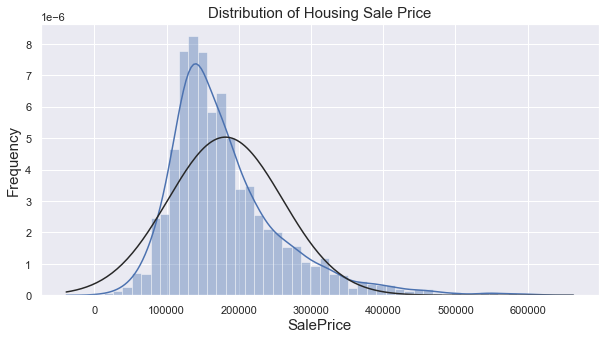

In [446]:
skew_plot(final_train_df['SalePrice']);

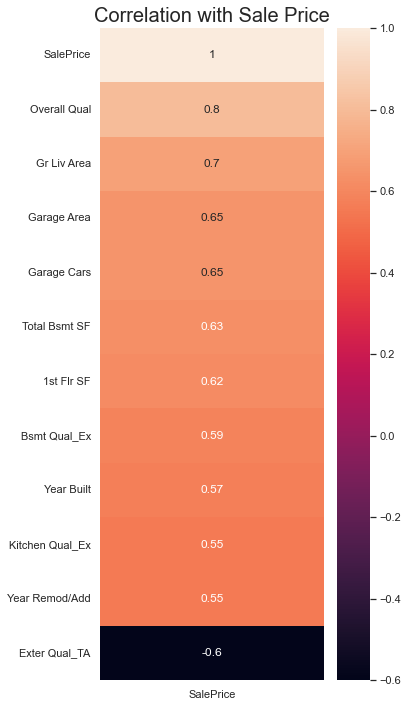

In [447]:
sns.set(rc={'figure.figsize':(5,12)})
b = sns.heatmap(pd.DataFrame(final_train_df.corr()['SalePrice'].sort_values(ascending=False)),annot=True)
b.axes.set_title('Correlation with Sale Price', fontsize=20);

### Conclusion (So - Far):
<br>
1) The Sale Price is right skewed. Therefore, it must be transformed at a later stage for analysis.
<br>
<br>
2) Area of the house, Garage, Kitchen Quality are the modifiable features that highly relate with Sale Price

In [448]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [449]:
calc_vif(final_train_df).sort_values(by='VIF')

,variables,VIF
2,Kitchen Qual_Ex,1.814556
1,Bsmt Qual_Ex,1.941069
0,Exter Qual_TA,4.497088
6,Total Bsmt SF,22.144932
8,Gr Liv Area,22.839764
10,Garage Area,31.435369
7,1st Flr SF,33.797877
11,SalePrice,34.795892
9,Garage Cars,35.069198
3,Overall Qual,65.318766


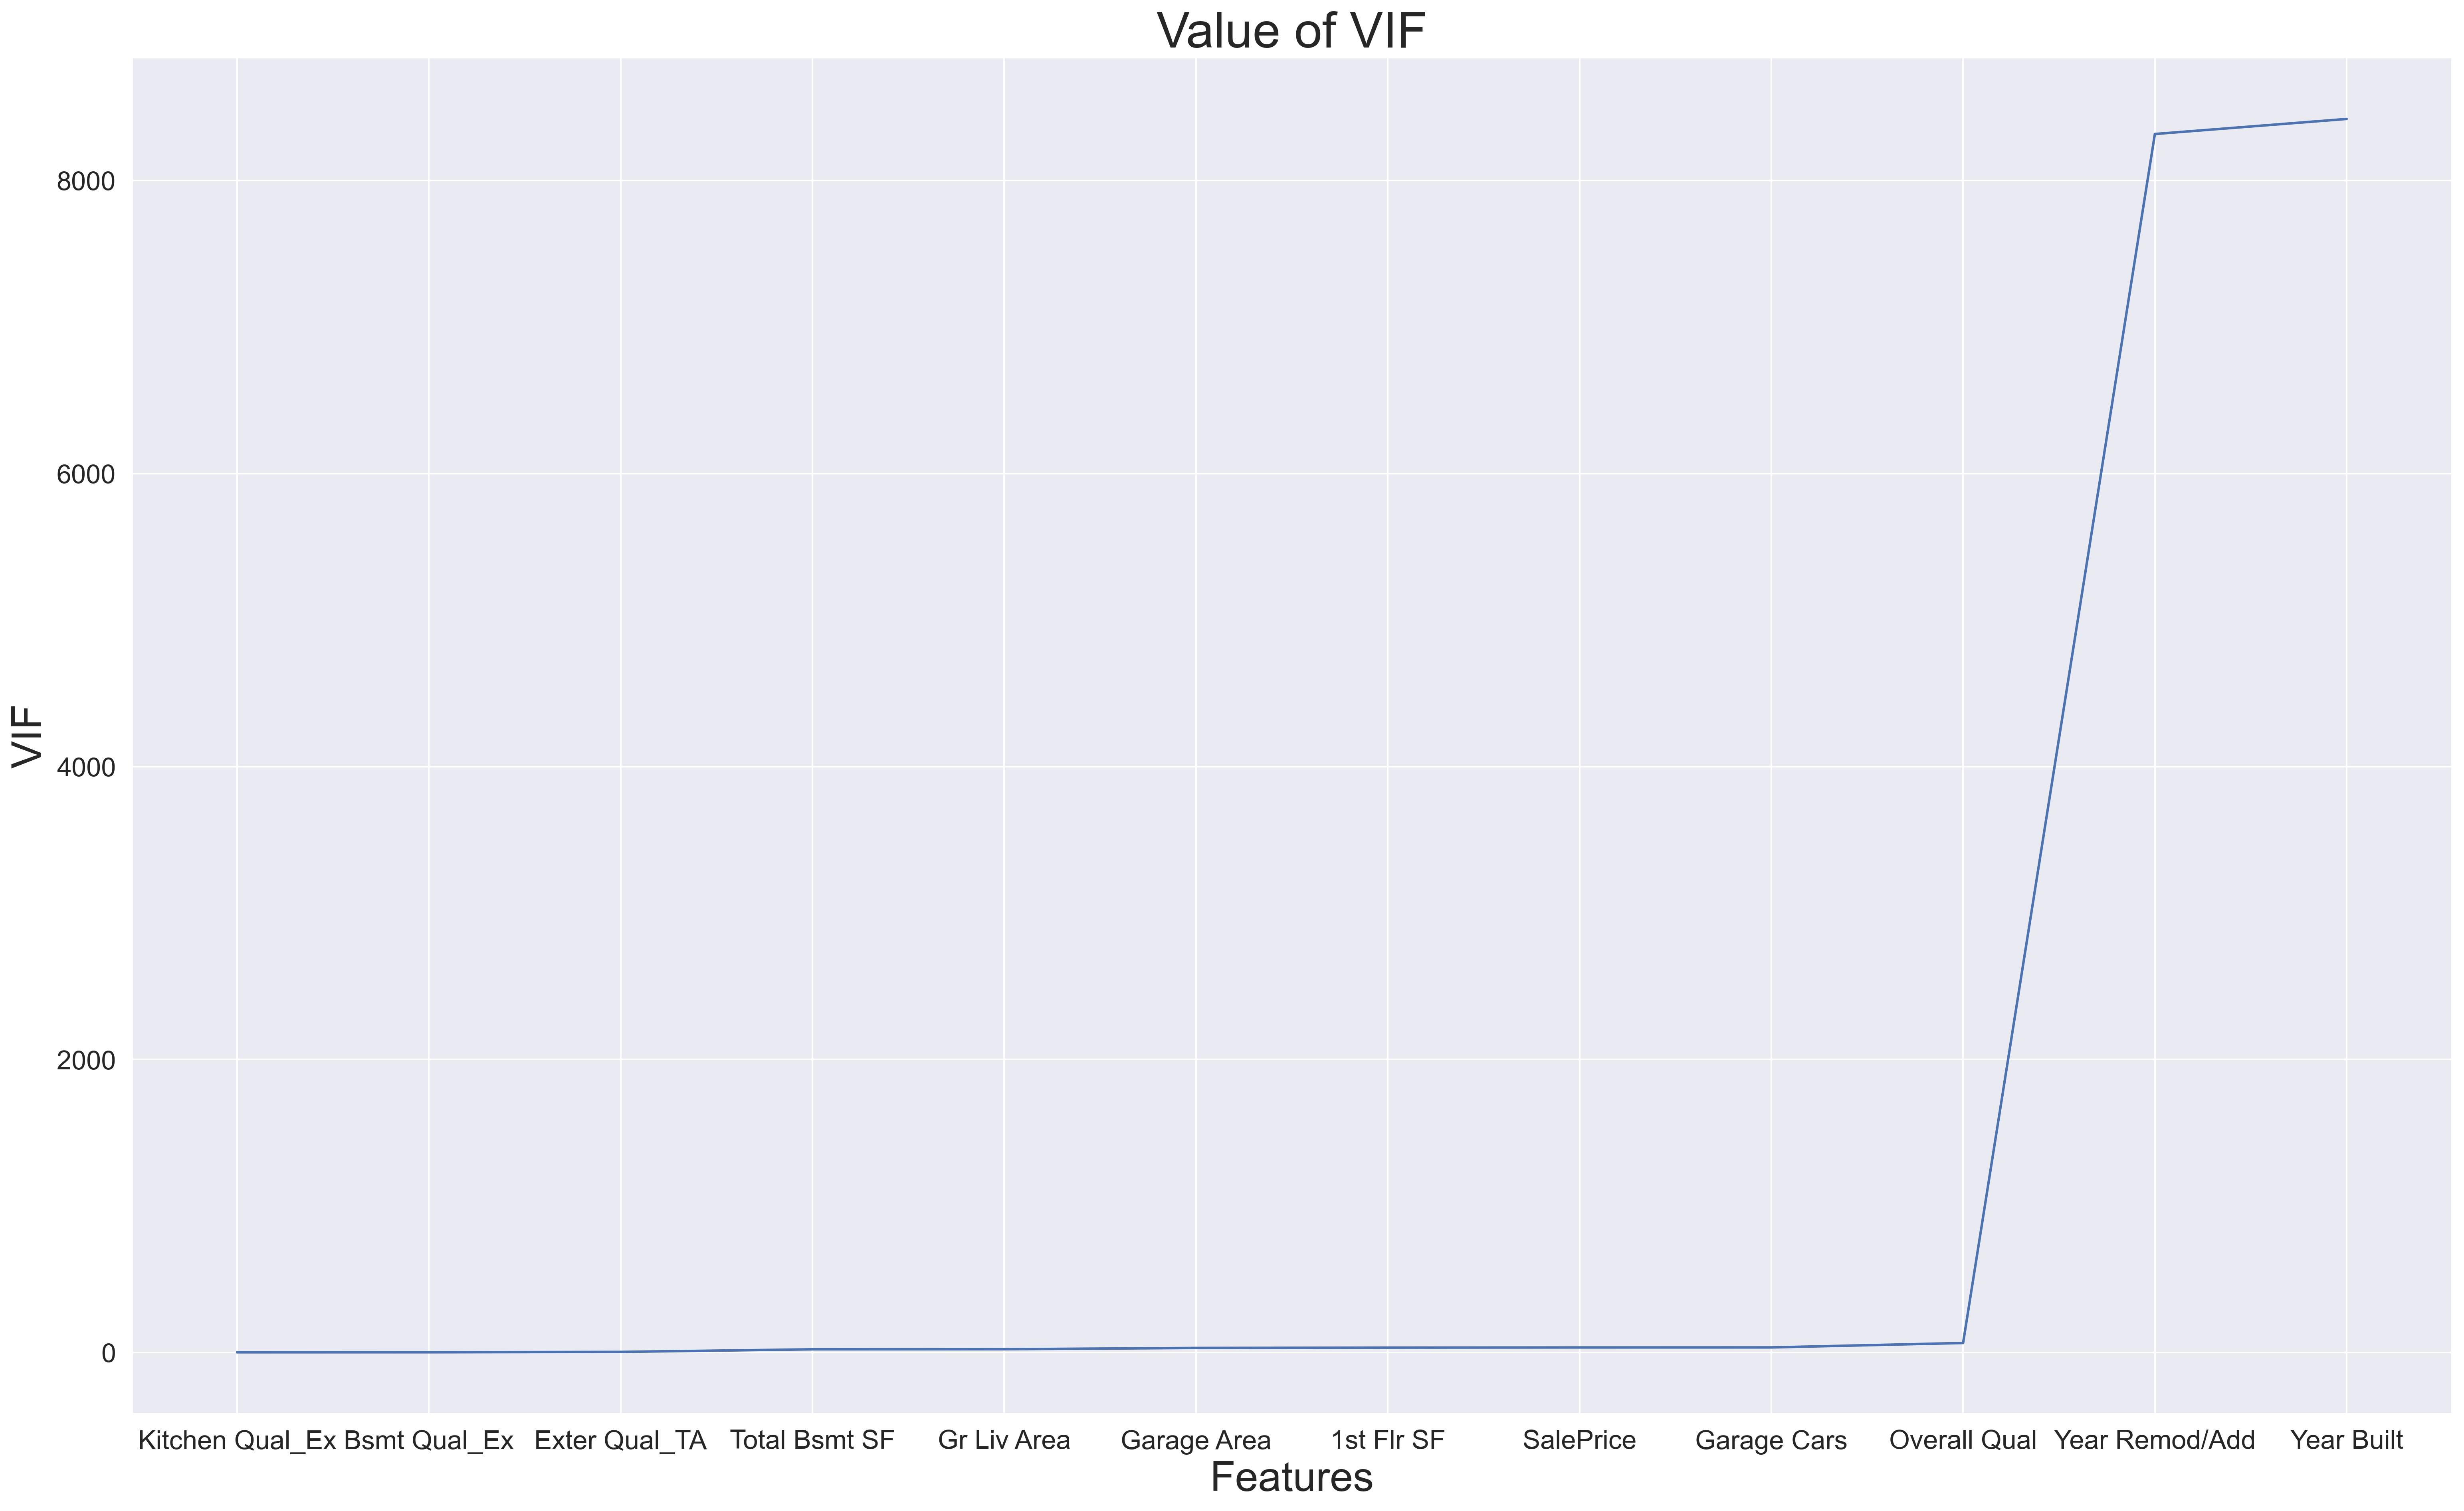

In [450]:
plt.figure(figsize=(25,15), dpi=300)
plt.plot(calc_vif(final_train_df).sort_values(by='VIF')['variables'],\
        calc_vif(final_train_df).sort_values(by='VIF')['VIF'])
plt.title('Value of VIF', fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Features', fontsize=25)
plt.ylabel('VIF', fontsize=25);

### Conclusion (So - Far):
<br>
1) Garage Cars is highly correlated with Gr Liv Area since a larger area is able to store more cars. Therefore, I will drop Garage Cars.
<br>
<br>
2) Kitchen Qual_Ex is highly correlated with Overall Qual, therefore I will drop Kitchen Qual_Ex.
<br>
<br>
2) While Year Built is a constant, thus I will drop this feature.

In [451]:
final_train_df.drop(labels=['Garage Cars', 'Kitchen Qual_Ex', 'Year Built'], \
       axis=1, inplace=True)

In [452]:
X = final_train_df.drop(labels='SalePrice', axis=1)
y = np.log(final_train_df['SalePrice'])

In [453]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

In [454]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

## Section 5: Model Engineering

### Linear Regression

In [455]:
def percentage_error(x,y):
    return (abs(x-y) / y) * 100

In [456]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
y_train_pred = np.exp(lr.predict(X_train_sc))
mse_train = mean_squared_error(np.exp(y_train), y_train_pred)
y_test_pred = np.exp(lr.predict(X_test_sc))
mse_test = mean_squared_error(np.exp(y_test),y_test_pred)
percentage_error(mse_test, mse_train)

73.9852317604984

### Performing Cross Validation on Linear Regression

In [457]:
mse_train = cross_val_score(lr, X_train_sc, y_train, scoring='neg_mean_squared_error', cv=250).mean()
mse_test = cross_val_score(lr, X_test_sc, y_test, scoring='neg_mean_squared_error', cv=250).mean()
percentage_error(mse_test, mse_train)

-7.161389488436412

### Polynomial Features (Degree =2, 3)

In [458]:
for n in range(2,4):
    poly = PolynomialFeatures(degree=n, include_bias=False)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    lr.fit(X_train_sc, y_train)
    y_train_pred = np.exp(lr.predict(X_train_sc))
    y_test_pred = np.exp(lr.predict(X_test_sc))
    mse_train = mean_squared_error(np.exp(y_train), y_train_pred)
    mse_test = mean_squared_error(np.exp(y_test), y_test_pred)
    print(f'When n={n}, the percentage error is {percentage_error(mse_test, mse_train)}')

When n=2, the percentage error is 0.39461273060912044
When n=3, the percentage error is 77.5009881147765


In [459]:
mse_test

978661098.068635

## Regularisation on Linear Regression

### LASSO regularization

Utilizing LASSO regularization

In [460]:
X = final_train_df.drop(labels='SalePrice', axis=1)
y = np.log(final_train_df['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [461]:
l_alphas = np.logspace(-5,0,100)
lasso_cv = LassoCV(alphas=l_alphas, cv=250, max_iter=50000)
lasso_cv.fit(X_train_sc, y_train)
y_train_pred = np.exp(lasso_cv.predict(X_train_sc))
y_test_pred = np.exp(lasso_cv.predict(X_test_sc))
test_score = mean_squared_error(y_test_pred, np.exp(y_test))
train_score = mean_squared_error(y_train_pred, np.exp(y_train))
percentage_error(test_score, train_score)

71.90535580889286

### Ridge regularization

Utilizing Ridge regularization

In [462]:
r_alphas = np.logspace(0,5,100)
ridge_cv = RidgeCV(alphas=r_alphas, cv=300)
ridge_cv.fit(X_train_sc, y_train)
y_train_pred = np.exp(ridge_cv.predict(X_train_sc))
y_test_pred = np.exp(ridge_cv.predict(X_test_sc))
test_score = mean_squared_error(y_test_pred, np.exp(y_test))
train_score = mean_squared_error(y_train_pred, np.exp(y_train))
percentage_error(test_score, train_score)

65.00171781659847

## Elastic Net

Utilizing Elastic Net

In [463]:
l1_ratios = np.linspace(0.01,1.0,100)
n_alphas = np.linspace(0.5,1.0,100)

elastic_net_model = ElasticNetCV(alphas=n_alphas, l1_ratio=l1_ratios, cv=250, n_jobs=-1)
elastic_net_model = elastic_net_model.fit(X_train_sc, y_train)
y_train_pred = np.exp(elastic_net_model.predict(X_train_sc))
y_test_pred = np.exp(elastic_net_model.predict(X_test_sc))
test_score = mean_squared_error(y_test_pred, np.exp(y_test))
train_score = mean_squared_error(y_train_pred, np.exp(y_train))
percentage_error(test_score, train_score)

59.973439027676335

## K Nearest Neighbors classification

Utilizing K Nearest Neighbors

In [464]:
X = final_train_df.drop(labels='SalePrice', axis=1)
y = final_train_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [465]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc, y_train)
train_score = knn.score(X_train_sc, y_train)
test_score = knn.score(X_test_sc, y_test)
percentage_error(test_score, train_score)

93.12767751917201

### Utilizing Polynomial Features (Degree =2) on test dataset

### Sub-Section 1: Explore Data

In [466]:
df_test = pd.read_csv('../datasets/test.csv')
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


### Sub-Section 2: Cleaning Data

In [467]:
df_test.drop(['PID', 'Id'], axis=1, inplace=True)
df_test.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [468]:
df_test.dropna(axis=0, subset=['Garage Area'], inplace=True)
df_test.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [469]:
columns_to_explore = ['Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Cond', 'Mas Vnr Area',
                     'Mas Vnr Type', 'Bsmt Half Bath', 'Bsmt Full Bath', 'Bsmt Unf SF', 'BsmtFin SF 2', 'BsmtFin SF 1',
                     'Total Bsmt SF', 'Garage Cond', 'Garage Qual', 'Garage Finish', 'Garage Yr Blt', 'Garage Type']
df_test[columns_to_explore]

,Bsmt Exposure,BsmtFin Type 2,BsmtFin Type 1,Bsmt Qual,Bsmt Cond,Mas Vnr Area,Mas Vnr Type,Bsmt Half Bath,Bsmt Full Bath,Bsmt Unf SF,BsmtFin SF 2,BsmtFin SF 1,Total Bsmt SF,Garage Cond,Garage Qual,Garage Finish,Garage Yr Blt,Garage Type
0,No,Unf,Unf,Fa,TA,0.0,None,0,0,1020,0,0,1020,Po,Po,Unf,1910.0,Detchd
1,No,Unf,Unf,Gd,TA,0.0,None,0,0,1967,0,0,1967,TA,TA,Fin,1977.0,Attchd
2,Av,Unf,GLQ,Gd,Gd,0.0,None,0,1,100,0,554,654,TA,TA,RFn,2006.0,Attchd
3,No,Unf,Unf,TA,TA,0.0,None,0,0,968,0,0,968,TA,Fa,Unf,1935.0,Detchd
4,No,Unf,BLQ,Gd,TA,247.0,BrkFace,0,1,785,0,609,1394,TA,TA,RFn,1963.0,Attchd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,No,LwQ,ALQ,TA,TA,0.0,None,0,1,0,153,931,1084,TA,TA,Unf,1974.0,Attchd
874,No,Unf,BLQ,TA,TA,410.0,BrkFace,0,0,529,0,575,1104,TA,TA,RFn,1966.0,Attchd
875,No,LwQ,BLQ,TA,TA,0.0,None,0,0,210,492,250,952,TA,TA,Unf,1968.0,Attchd
876,No,Unf,ALQ,TA,TA,0.0,None,0,0,248,0,616,864,TA,TA,Unf,1974.0,Detchd


In [470]:
for column_name in df_test[columns_to_explore].columns:
    if is_string_dtype(df_test[column_name]):
        df_test[column_name] = df_test[column_name].fillna('None')
    else:
        df_test[column_name] = df_test[column_name].fillna(0)        

In [471]:
df_test.drop(labels=['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1, inplace=True)
df_test.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
0,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,60,112,0,0,0,0,4,2006,WD
1,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,170,0,0,0,0,0,0,8,2006,WD
2,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,100,24,0,0,0,0,0,9,2006,New
3,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,184,0,0,0,0,7,2007,WD
4,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,76,0,0,185,0,0,7,2009,WD


In [472]:
df_test['Fireplace Qu'].fillna(value='None', inplace=True)

In [473]:
df_test.groupby('Neighborhood').mean()['Lot Frontage']

Neighborhood
Blmngtn    45.500000
Blueste    26.750000
BrDale     21.818182
BrkSide    54.200000
ClearCr    81.625000
CollgCr    72.696970
Crawfor    71.285714
Edwards    65.541667
Gilbert    79.363636
Greens     41.750000
IDOTRR     63.217391
MeadowV    23.500000
Mitchel    74.280000
NAmes      75.254545
NPkVill    29.800000
NWAmes     82.703704
NoRidge    98.277778
NridgHt    78.477273
OldTown    59.541667
SWISU      60.692308
Sawyer     79.222222
SawyerW    71.096774
Somerst    66.022222
StoneBr    68.166667
Timber     85.900000
Veenker    90.000000
Name: Lot Frontage, dtype: float64

In [474]:
df_test['Lot Frontage'] = df_test.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [475]:
df_test['Lot Frontage'].fillna(value=0, inplace=True)

In [476]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 877
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      878 non-null    int64  
 1   MS Zoning        878 non-null    object 
 2   Lot Frontage     878 non-null    float64
 3   Lot Area         878 non-null    int64  
 4   Street           878 non-null    object 
 5   Lot Shape        878 non-null    object 
 6   Land Contour     878 non-null    object 
 7   Utilities        878 non-null    object 
 8   Lot Config       878 non-null    object 
 9   Land Slope       878 non-null    object 
 10  Neighborhood     878 non-null    object 
 11  Condition 1      878 non-null    object 
 12  Condition 2      878 non-null    object 
 13  Bldg Type        878 non-null    object 
 14  House Style      878 non-null    object 
 15  Overall Qual     878 non-null    int64  
 16  Overall Cond     878 non-null    int64  
 17  Year Built      

In [477]:
df_test['MS SubClass'] = df_test['MS SubClass'].astype(object)

In [478]:
df_test.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,190,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,FuseP,Fa,Typ,None,Detchd,Unf,Po,Po,Y,WD
1,90,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,SBrkr,TA,Typ,None,Attchd,Fin,TA,TA,Y,WD
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,New
3,30,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,SBrkr,TA,Typ,None,Detchd,Unf,Fa,TA,N,WD
4,20,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,SBrkr,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,...,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,WD
874,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD
875,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,...,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,WD
876,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,...,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD


In [479]:
object_columns = []

for column_name in df_test.select_dtypes(include='object').columns:
    object_columns.append(column_name)

In [480]:
df_object_columns = pd.get_dummies(df_test[object_columns])
df_object_columns

,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
874,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
875,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
876,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [481]:
df_numeric_columns = df_test.select_dtypes(exclude='object')
df_numeric_columns

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,69.000000,9142,6,8,1910,1950,0.0,0,0,1020,...,440,0,60,112,0,0,0,0,4,2006
1,79.222222,9662,5,4,1977,1977,0.0,0,0,1967,...,580,170,0,0,0,0,0,0,8,2006
2,58.000000,17104,7,5,2006,2006,0.0,554,0,100,...,426,100,24,0,0,0,0,0,9,2006
3,60.000000,8520,5,6,1923,2006,0.0,0,0,968,...,480,0,0,184,0,0,0,0,7,2007
4,75.254545,9500,6,5,1963,1963,247.0,609,0,785,...,514,0,76,0,0,185,0,0,7,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,80.000000,8000,6,6,1974,1974,0.0,931,153,0,...,488,0,96,0,0,0,0,0,11,2007
874,90.000000,14670,6,7,1966,1999,410.0,575,0,529,...,480,0,230,0,0,0,0,0,8,2008
875,55.000000,8250,5,5,1968,1968,0.0,250,492,210,...,322,0,63,0,0,0,0,0,8,2008
876,60.000000,9000,4,6,1971,1971,0.0,616,0,248,...,528,0,0,0,0,0,0,0,5,2007


In [482]:
df_numeric_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 877
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     878 non-null    float64
 1   Lot Area         878 non-null    int64  
 2   Overall Qual     878 non-null    int64  
 3   Overall Cond     878 non-null    int64  
 4   Year Built       878 non-null    int64  
 5   Year Remod/Add   878 non-null    int64  
 6   Mas Vnr Area     878 non-null    float64
 7   BsmtFin SF 1     878 non-null    int64  
 8   BsmtFin SF 2     878 non-null    int64  
 9   Bsmt Unf SF      878 non-null    int64  
 10  Total Bsmt SF    878 non-null    int64  
 11  1st Flr SF       878 non-null    int64  
 12  2nd Flr SF       878 non-null    int64  
 13  Low Qual Fin SF  878 non-null    int64  
 14  Gr Liv Area      878 non-null    int64  
 15  Bsmt Full Bath   878 non-null    int64  
 16  Bsmt Half Bath   878 non-null    int64  
 17  Full Bath       

In [483]:
final_test_df = pd.concat([df_object_columns, df_numeric_columns], axis=1)
final_test_df

,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,0,0,0,0,0,0,0,0,0,0,...,440,0,60,112,0,0,0,0,4,2006
1,0,0,0,0,0,0,0,0,0,0,...,580,170,0,0,0,0,0,0,8,2006
2,0,0,0,0,0,1,0,0,0,0,...,426,100,24,0,0,0,0,0,9,2006
3,0,1,0,0,0,0,0,0,0,0,...,480,0,0,184,0,0,0,0,7,2007
4,1,0,0,0,0,0,0,0,0,0,...,514,0,76,0,0,185,0,0,7,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,0,0,0,0,0,1,0,0,0,0,...,488,0,96,0,0,0,0,0,11,2007
874,0,0,0,0,0,1,0,0,0,0,...,480,0,230,0,0,0,0,0,8,2008
875,1,0,0,0,0,0,0,0,0,0,...,322,0,63,0,0,0,0,0,8,2008
876,1,0,0,0,0,0,0,0,0,0,...,528,0,0,0,0,0,0,0,5,2007


In [484]:
for column_name in final_test_df.columns:
    if column_name in my_list:
        final_test_df.drop(labels=column_name, axis=1, inplace=True)

In [485]:
final_test_df

,Roof Matl_Metal,Roof Matl_Roll,Exterior 1st_PreCast,Exterior 2nd_Other,Exterior 2nd_PreCast,Mas Vnr Type_CBlock,Exter Qual_TA,Bsmt Qual_Ex,Heating_Floor,Kitchen Qual_Ex,Kitchen Qual_Po,Sale Type_VWD,Overall Qual,Year Built,Year Remod/Add,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Cars,Garage Area
0,0,0,0,0,0,0,1,0,0,0,0,0,6,1910,1950,1020,908,1928,1,440
1,0,0,0,0,0,0,1,0,0,0,0,0,5,1977,1977,1967,1967,1967,2,580
2,0,0,0,0,0,0,0,0,0,0,0,0,7,2006,2006,654,664,1496,2,426
3,0,0,0,0,0,0,0,0,0,0,0,0,5,1923,2006,968,968,968,2,480
4,0,0,0,0,0,0,1,0,0,0,0,0,6,1963,1963,1394,1394,1394,2,514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,0,0,0,0,0,0,1,0,0,0,0,0,6,1974,1974,1084,1084,1877,2,488
874,0,0,0,0,0,0,0,0,0,0,0,0,6,1966,1999,1104,1104,1988,2,480
875,0,0,0,0,0,0,1,0,0,0,0,0,5,1968,1968,952,1211,1211,1,322
876,0,0,0,0,0,0,1,0,0,0,0,0,4,1971,1971,864,864,864,2,528


In [486]:
for column_name in final_test_df:
    if column_name not in final_train_df:
        final_test_df.drop(labels=column_name, axis=1, inplace=True)       
final_test_df

,Exter Qual_TA,Bsmt Qual_Ex,Overall Qual,Year Remod/Add,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area
0,1,0,6,1950,1020,908,1928,440
1,1,0,5,1977,1967,1967,1967,580
2,0,0,7,2006,654,664,1496,426
3,0,0,5,2006,968,968,968,480
4,1,0,6,1963,1394,1394,1394,514
...,...,...,...,...,...,...,...,...
873,1,0,6,1974,1084,1084,1877,488
874,0,0,6,1999,1104,1104,1988,480
875,1,0,5,1968,952,1211,1211,322
876,1,0,4,1971,864,864,864,528


### Sub-Section 3: Executing Polynomial Features (Degree =2) on test data

In [487]:
X_test_data_sc = ss.transform(final_test_df)

In [488]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_test_data_poly = poly.transform(X_test_data_sc)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)
lr.fit(X_train_sc, y_train)
prediction = np.exp(lr.predict(X_test_data_poly))

C:\Users\SONGYI~1\AppData\Local\Temp/ipykernel_9956/1193702011.py:8: RuntimeWarning: overflow encountered in exp
  prediction = np.exp(lr.predict(X_test_data_poly))


In [489]:
predictions = pd.DataFrame(prediction, columns=['SalePrice'])
predictions                    

,SalePrice
0,0.0
1,0.0
2,inf
3,inf
4,0.0
...,...
873,0.0
874,inf
875,0.0
876,0.0


### Sub-Section 3: Saving CSV file for submission

In [490]:
df = pd.read_csv('../datasets/test.csv')
df['Id']

0      2658
1      2718
2      2414
3      1989
4       625
       ... 
873    1662
874    1234
875    1373
876    1672
877    1939
Name: Id, Length: 878, dtype: int64

In [491]:
predictions = pd.concat([df['Id'], predictions], axis=1)
predictions

,Id,SalePrice
0,2658,0.0
1,2718,0.0
2,2414,inf
3,1989,inf
4,625,0.0
...,...,...
873,1662,0.0
874,1234,inf
875,1373,0.0
876,1672,0.0


In [492]:
predictions.to_csv('predictions.csv', index=False)

## Section 6: Deep Dive

### Analysing the coefficients for Polynomial Regression (n=2)

1) I will analyse the top 3 neighbourhoods by sample size.
<br>
<br>
2) The rationale is so that I have sufficient sample for analysis.

In [493]:
X = final_train_df.drop(labels='SalePrice', axis=1)
y = np.log(final_train_df['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

In [494]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [495]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_sc)
X_test_poly = poly.transform(X_test_sc)
lr.fit(X_train_poly, y_train)

LinearRegression()

In [496]:
Poly_Features_Coefficients = pd.concat([pd.DataFrame(poly.get_feature_names(X_train.columns)), \
                                       np.exp(pd.DataFrame(lr.coef_))], axis=1)
Poly_Features_Coefficients.columns = ['Feature', 'Coefficient']
Poly_Features_Coefficients.sort_values(by='Coefficient', ascending=False).head(8)

,Feature,Coefficient
1,Bsmt Qual_Ex,inf
6,Gr Liv Area,1.138013
2,Overall Qual,1.127337
4,Total Bsmt SF,1.098703
3,Year Remod/Add,1.076802
7,Garage Area,1.050131
38,1st Flr SF^2,1.026469
5,1st Flr SF,1.024815


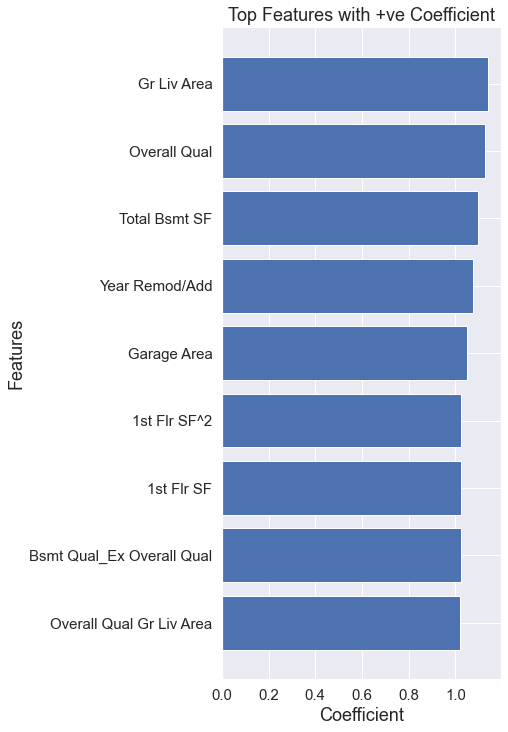

In [497]:
top_10_positive_features = Poly_Features_Coefficients.sort_values(by='Coefficient', ascending=False).\
                            head(10)
fig,ax = plt.subplots()
ax.barh(top_10_positive_features['Feature'], top_10_positive_features['Coefficient'])
ax.invert_yaxis()
plt.title('Top Features with +ve Coefficient', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.xlabel('Coefficient', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

### Conclusion
<br>
1) In order to appreciate homes in Ames, features that generate the highest Sale Price would be Total Basement Square Feet, Year Remodified and Garage Area.
<br>
<br>
3) Gr Liv Area has the highest correlation with Sale Price however I have assumed it is an immutable feature therefore an investor has no options to increase the ground area of one's asset.
<br>
<br>
2) Take note that although Overall Quality has the second highest correlation with the Sale Price. In reality, the Overall Quality of a home is dependent on multiple factors including but not exhaustively Year Remodified, Garage Area and Total Basement Square Feet.
<br>
<br>
3) On a side note, our model does not have any variables that generate negative correlations therefore implying that an investment into the respective feature would result in a fall in Sale Price.

## Section 6: Deep Dive

### Analysing the top 3 neighbourhoods

1) I will analyse the top 3 neighbourhoods by sample size.
<br>
<br>
2) The rationale is so that I have sufficient sample for analysis.

In [498]:
df_train = pd.read_csv('../datasets/train.csv')
df_train

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


In [499]:
CollgCr_OldTown_Somerst = df_train[(df_train['Neighborhood'] == 'CollgCr') | \
                                   (df_train['Neighborhood'] == 'OldTown') | \
                                   (df_train['Neighborhood'] == 'Somerst')]
CollgCr_OldTown_Somerst

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
11,2752,906380150,20,RL,64.0,7488,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,2,2006,WD,183600
13,1177,533236070,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,12,2008,ConLD,200000
14,1480,907418040,20,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2008,WD,193000
16,1311,902301140,70,RM,34.0,4571,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,5,2008,COD,98000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,2595,535355100,50,RL,50.0,7000,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,5,2006,COD,112000
2019,2167,907420110,60,RL,64.0,9045,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2007,WD,167000
2021,2810,907410100,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,3,2006,WD,195800
2034,2775,907175060,20,RL,79.0,9236,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2006,WD,217000


In [500]:
CollgCr_OldTown_Somerst.drop(labels=['PID', 'Id', 'Garage Area','Pool QC', 'Misc Feature', 'Alley', 'Fence'], \
                axis=1, inplace=True)
CollgCr_OldTown_Somerst.head()

C:\Users\Song Yi\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
8,20,RL,NaN,15783,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,324,0,0,0,0,400,6,2007,WD,112500
11,20,RL,64.0,7488,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,58,0,0,0,0,0,2,2006,WD,183600
13,160,FV,24.0,2645,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,12,2008,ConLD,200000
14,20,RL,74.0,9627,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,50,0,0,0,0,0,6,2008,WD,193000
16,70,RM,34.0,4571,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,96,0,0,0,0,5,2008,COD,98000


In [501]:
CollgCr_OldTown_Somerst['Lot Frontage'] = CollgCr_OldTown_Somerst.groupby('Neighborhood')['Lot Frontage'].\
                                          transform(lambda value:value.fillna(value.mean()))

C:\Users\SONGYI~1\AppData\Local\Temp/ipykernel_9956/1190757887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CollgCr_OldTown_Somerst['Lot Frontage'] = CollgCr_OldTown_Somerst.groupby('Neighborhood')['Lot Frontage'].\


In [502]:
CollgCr_OldTown_Somerst['Lot Frontage'].fillna(value=0, inplace=True)

C:\Users\Song Yi\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [503]:
for column_name in CollgCr_OldTown_Somerst.columns:
    if is_string_dtype(CollgCr_OldTown_Somerst[column_name]):
            CollgCr_OldTown_Somerst[column_name] = \
            CollgCr_OldTown_Somerst[column_name].fillna('None')
    else:
            CollgCr_OldTown_Somerst[column_name] = \
            CollgCr_OldTown_Somerst[column_name].fillna(0)

C:\Users\SONGYI~1\AppData\Local\Temp/ipykernel_9956/3214161857.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CollgCr_OldTown_Somerst[column_name] = \
C:\Users\SONGYI~1\AppData\Local\Temp/ipykernel_9956/3214161857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CollgCr_OldTown_Somerst[column_name] = \


In [504]:
CollgCr_OldTown_Somerst['MS SubClass'] = CollgCr_OldTown_Somerst['MS SubClass'].\
                                        astype(object)

C:\Users\SONGYI~1\AppData\Local\Temp/ipykernel_9956/3977934993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CollgCr_OldTown_Somerst['MS SubClass'] = CollgCr_OldTown_Somerst['MS SubClass'].\


In [505]:
object_columns = []
for column_name in CollgCr_OldTown_Somerst.select_dtypes(include='object').columns:
                    object_columns.append(column_name)
    
df_object_columns = pd.get_dummies(CollgCr_OldTown_Somerst[object_columns])

In [506]:
df_numeric_columns = CollgCr_OldTown_Somerst.select_dtypes(exclude='object')

In [507]:
CollgCr_OldTown_Somerst = pd.concat([df_object_columns, df_numeric_columns], axis=1)

In [508]:
mylist = CollgCr_OldTown_Somerst.corr()['SalePrice'][abs(CollgCr_OldTown_Somerst.corr()['SalePrice']) < 0.55 ].index

In [509]:
CollgCr_OldTown_Somerst.drop(labels=mylist, axis=1, inplace=True)

In [510]:
CollgCr_OldTown_Somerst.drop(labels=['1st Flr SF', 'Year Built', 'Gr Liv Area', 'Year Remod/Add', \
                                     'Neighborhood_OldTown', 'Street_Pave'], axis=1, inplace=True)

In [511]:
CollgCr_OldTown_Somerst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 8 to 2036
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Utilities_AllPub  473 non-null    uint8  
 1   Exter Qual_Gd     473 non-null    uint8  
 2   Exter Qual_TA     473 non-null    uint8  
 3   Foundation_PConc  473 non-null    uint8  
 4   Heating QC_Ex     473 non-null    uint8  
 5   Kitchen Qual_TA   473 non-null    uint8  
 6   Overall Qual      473 non-null    int64  
 7   Total Bsmt SF     473 non-null    float64
 8   Full Bath         473 non-null    int64  
 9   Garage Cars       473 non-null    float64
 10  Pool Area         473 non-null    int64  
 11  SalePrice         473 non-null    int64  
dtypes: float64(2), int64(4), uint8(6)
memory usage: 28.6 KB


In [512]:
X = CollgCr_OldTown_Somerst.drop(labels='SalePrice', axis=1)
y = CollgCr_OldTown_Somerst['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

In [513]:
calc_vif(X).sort_values(by='VIF', ascending=False)

C:\Users\Song Yi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,Utilities_AllPub,100.351649
2,Exter Qual_TA,9.797046
1,Exter Qual_Gd,8.720802
6,Overall Qual,2.573773
3,Foundation_PConc,2.395825
5,Kitchen Qual_TA,2.337205
4,Heating QC_Ex,1.929803
9,Garage Cars,1.683082
8,Full Bath,1.658967
7,Total Bsmt SF,1.642717


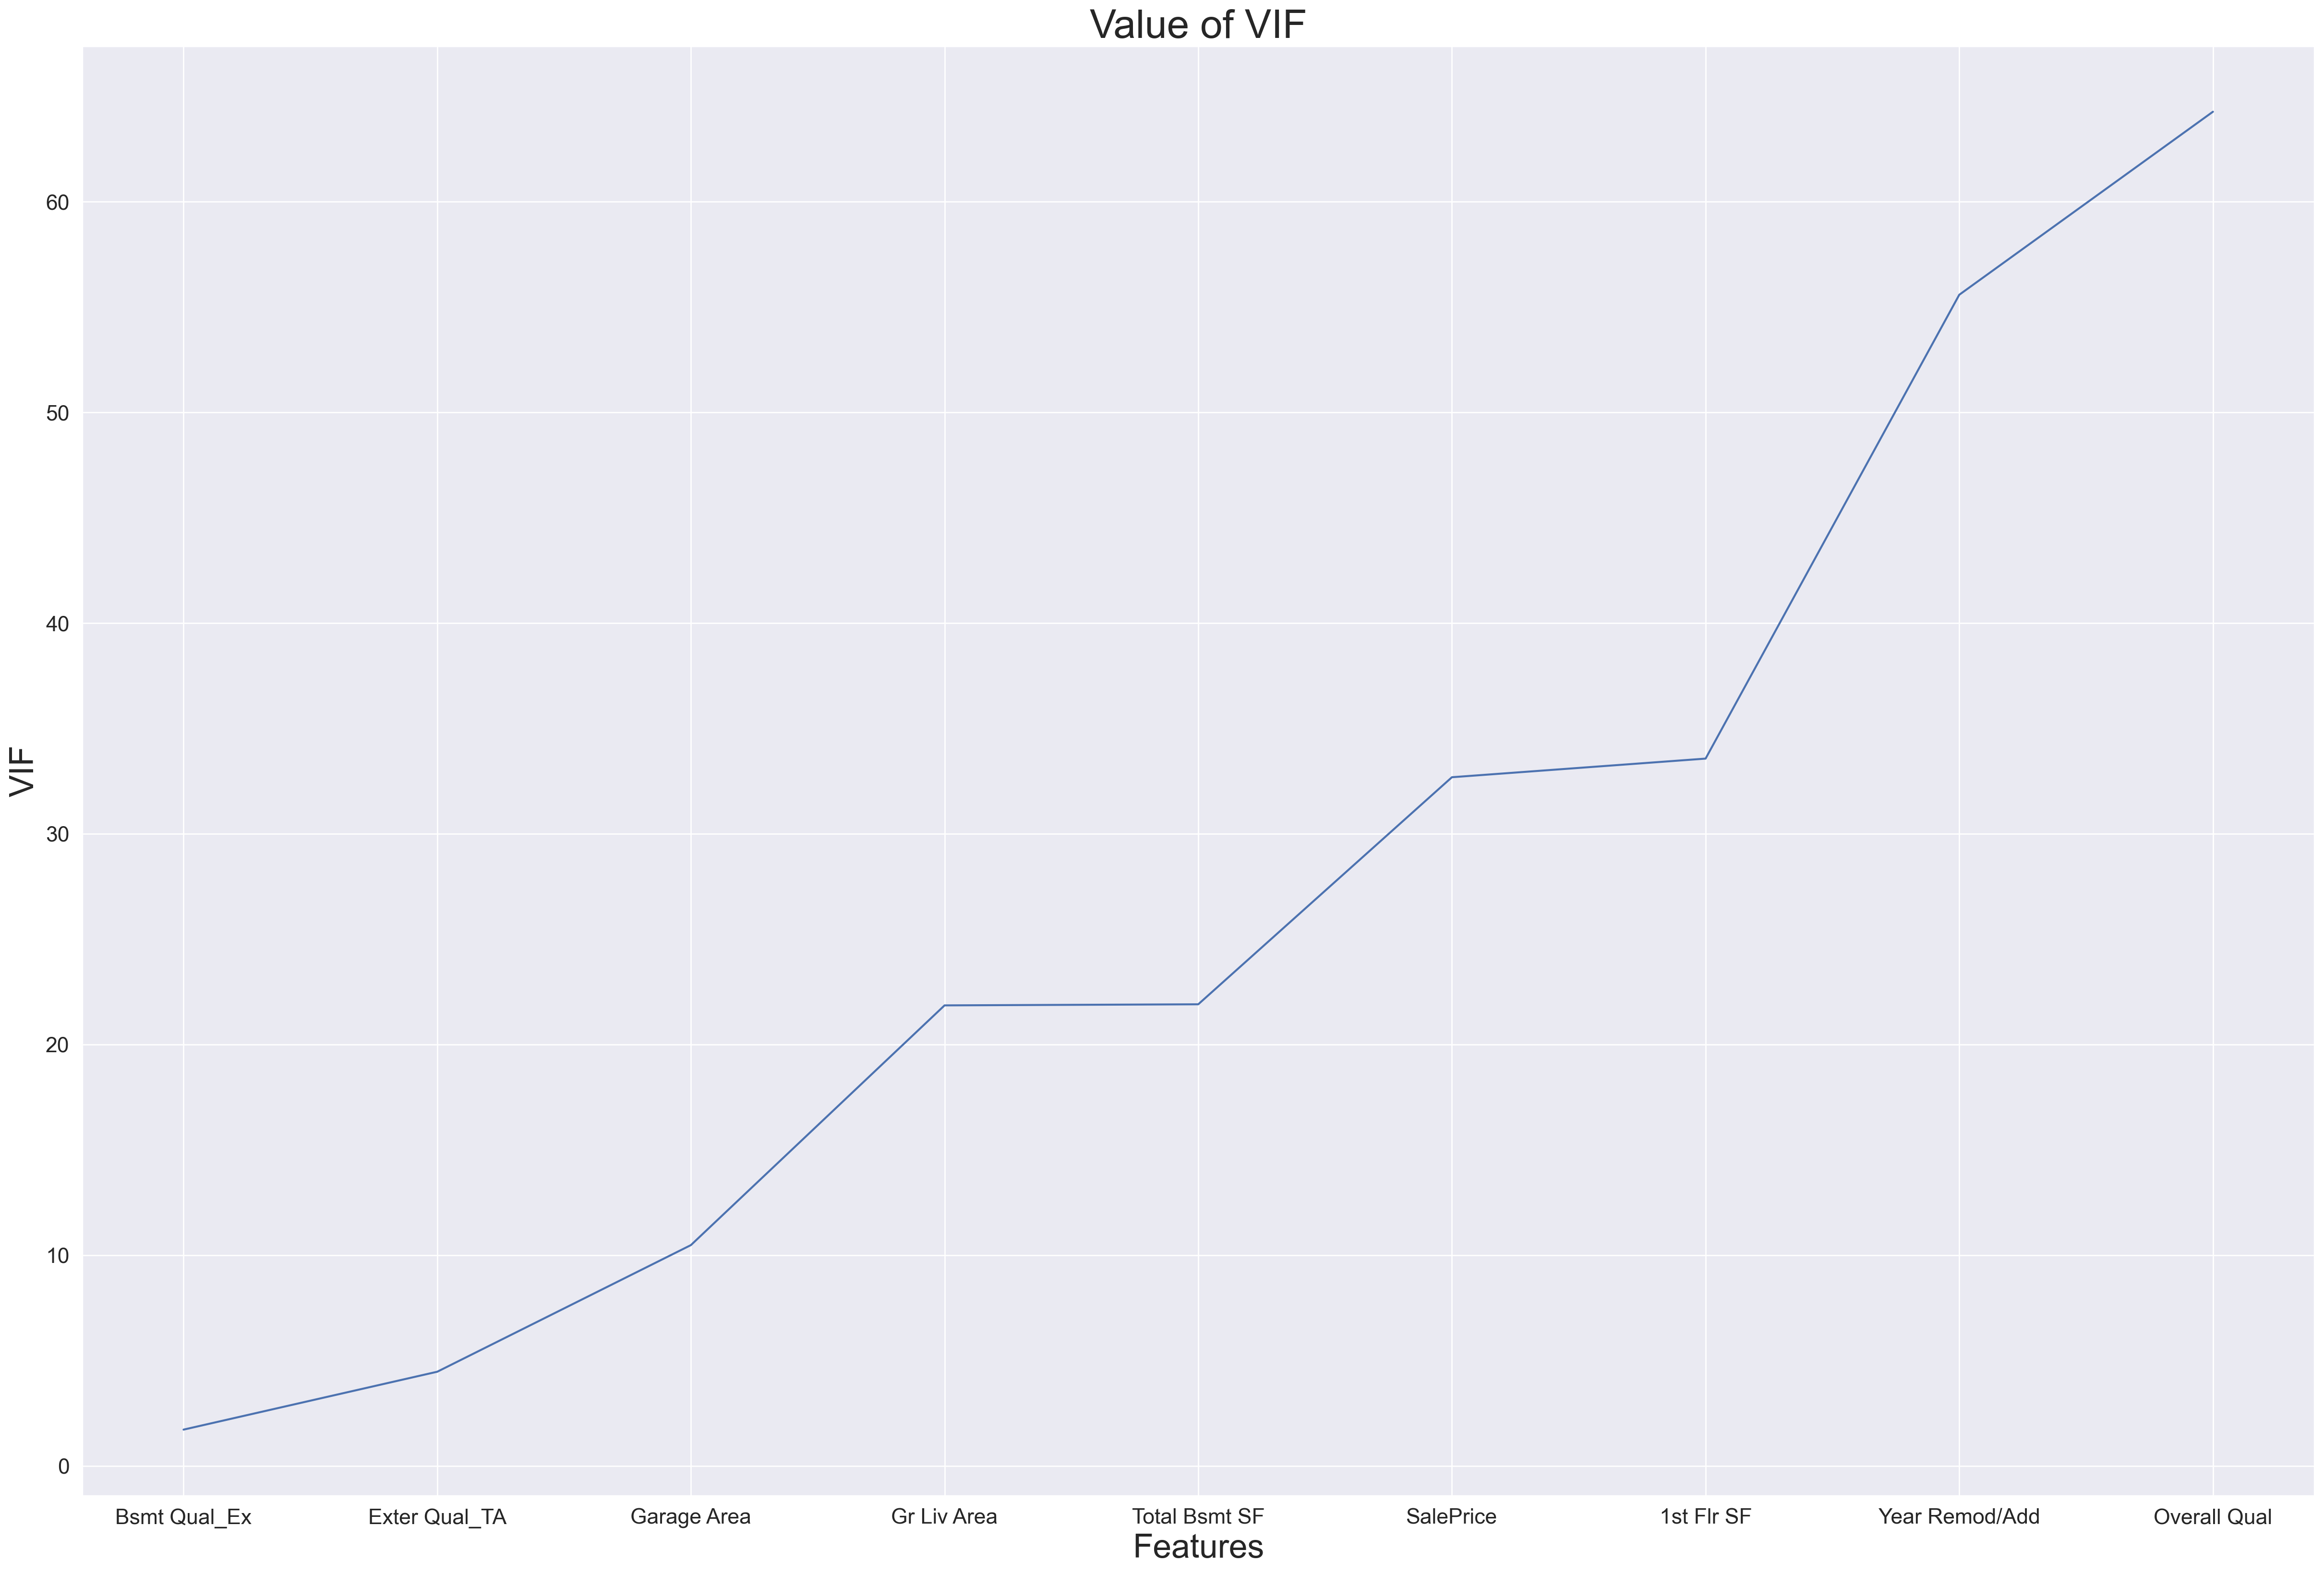

In [514]:
plt.figure(figsize=(30,20), dpi=200)
plt.plot(calc_vif(final_train_df).sort_values(by='VIF')['variables'],\
        calc_vif(final_train_df).sort_values(by='VIF')['VIF'])
plt.title('Value of VIF', fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Features', fontsize=25)
plt.ylabel('VIF', fontsize=25);

### Conclusion (So - Far):
<br>
1) Foundation_PConc and Utilities_AllPub are highly correlated with Overall Qual, therefore I will drop the former 2 features.

In [515]:
X.drop(labels=['Foundation_PConc', 'Utilities_AllPub'], axis=1, inplace=True)

In [516]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [517]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_sc)
X_test_poly = poly.transform(X_test_sc)

In [518]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [519]:
Poly_Features_Coefficients = pd.concat([pd.DataFrame(poly.get_feature_names(X_train.columns)), \
                                       pd.DataFrame(lr.coef_)], axis=1)
Poly_Features_Coefficients.columns = ['Feature', 'Coefficient']
Poly_Features_Coefficients

,Feature,Coefficient
0,1,-7.811580e+12
1,Utilities_AllPub,4.461671e+16
2,Exter Qual_Gd,-4.598891e+16
3,Exter Qual_TA,-6.121437e+16
4,Foundation_PConc,4.573801e+14
...,...,...
73,Full Bath Garage Cars,2.664000e+03
74,Full Bath Pool Area,0.000000e+00
75,Garage Cars^2,8.000000e+00
76,Garage Cars Pool Area,0.000000e+00


In [520]:
Poly_Features_Coefficients[~Poly_Features_Coefficients['Feature'].str.contains('2')].\
sort_values(by='Coefficient', ascending=False).head(25)

,Feature,Coefficient
1,Utilities_AllPub,4.461671e+16
5,Heating QC_Ex,1.285602e+16
25,Exter Qual_Gd Foundation_PConc,2.648357e+15
34,Exter Qual_TA Foundation_PConc,2.633372e+15
14,Utilities_AllPub Exter Qual_TA,2.437471e+15
15,Utilities_AllPub Foundation_PConc,2.082640e+15
21,Utilities_AllPub Garage Cars,1.910208e+15
32,Exter Qual_Gd Pool Area,1.759634e+15
13,Utilities_AllPub Exter Qual_Gd,1.635444e+15
18,Utilities_AllPub Overall Qual,1.011421e+15


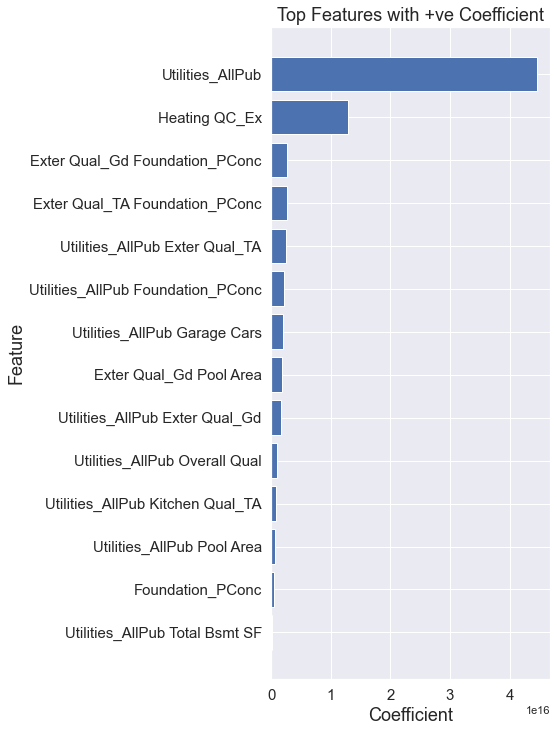

In [521]:
top_25_positive_features = Poly_Features_Coefficients[~Poly_Features_Coefficients['Feature'].str.\
                                             contains('2')].sort_values(by='Coefficient', \
                                             ascending=False).head(14)
fig,ax = plt.subplots()
ax.barh(top_25_positive_features['Feature'], top_25_positive_features['Coefficient'])
ax.invert_yaxis()
plt.title('Top Features with +ve Coefficient', fontsize=18)
plt.ylabel('Feature', fontsize=18)
plt.xlabel('Coefficient', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.set(rc={'figure.figsize':(15,15)});

In [522]:
Poly_Features_Coefficients[~Poly_Features_Coefficients['Feature'].str.\
                                             contains('2')].sort_values(by='Coefficient', \
                                             ascending=False).tail(25)

,Feature,Coefficient
70,Total Bsmt SF Garage Cars,-5.520000e+02
51,Heating QC_Ex Kitchen Qual_TA,-6.920000e+02
44,Foundation_PConc Kitchen Qual_TA,-8.000000e+02
55,Heating QC_Ex Garage Cars,-1.656000e+03
48,Foundation_PConc Garage Cars,-1.678000e+03
52,Heating QC_Ex Overall Qual,-1.768000e+03
61,Kitchen Qual_TA Garage Cars,-2.212000e+03
29,Exter Qual_Gd Total Bsmt SF,-2.670750e+03
69,Total Bsmt SF Full Bath,-3.537000e+03
38,Exter Qual_TA Total Bsmt SF,-5.613000e+03


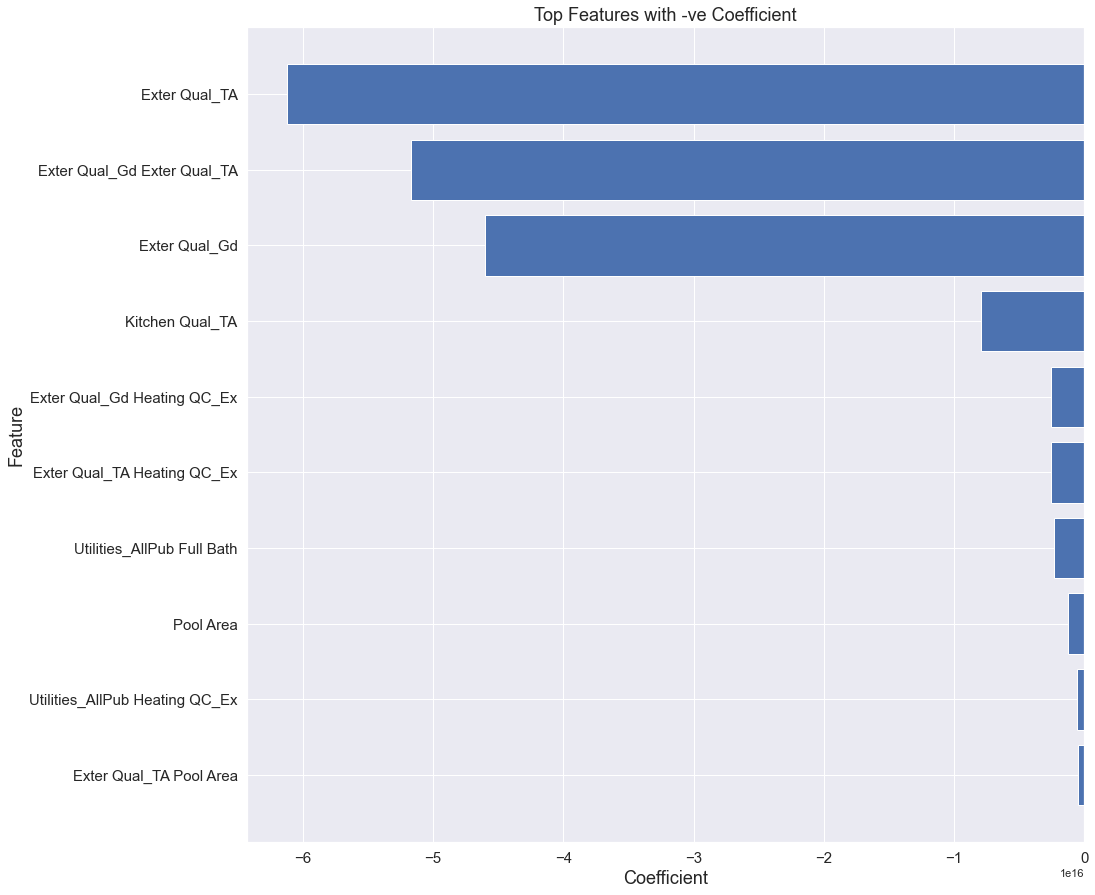

In [523]:
bottom_25_negative_features = Poly_Features_Coefficients[~Poly_Features_Coefficients['Feature'].str.\
                                             contains('2')].sort_values(by='Coefficient', \
                                             ascending=False).tail(10)
fig,ax = plt.subplots()
ax.barh(bottom_25_negative_features['Feature'], bottom_25_negative_features['Coefficient'])
plt.title('Top Features with -ve Coefficient', fontsize=18)
plt.ylabel('Feature', fontsize=18)
plt.xlabel('Coefficient', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.set(rc={'figure.figsize':(15,15)});

### Conclusion
<br>
1) In order to appreciate homes in CollgCr,OldTown or Somerst areas, an investor can invest in the foundation, kitchen and Pool Area of one's home to maximise the Sale Price.
<br>
<br>
2) Pairing an increase in Utilities with a rise in cars the Garage is able to store would also generate a positive return on investment.
<br>
<br>
3) However, on the downside, improving the External Quality of the house lead to a depreciation of the asset.